In [4]:
import pandas as pd
import seaborn as sns

In [5]:
movies_df = pd.read_csv('movies.csv')

In [6]:
movies_df.columns

Index(['rank', 'id', 'name', 'year', 'imbd_votes', 'imdb_rating',
       'certificate', 'duration', 'genre', 'cast_id', 'cast_name',
       'director_id', 'director_name', 'writter_name', 'writter_id',
       'img_link'],
      dtype='object')

In [8]:
movies_df.describe()

,rank,year,imbd_votes,imdb_rating
count,250.000000,250.000000,2.500000e+02,250.000000
mean,125.500000,1986.456000,6.204287e+05,8.311200
std,72.312977,25.214423,5.014117e+05,0.229445
min,1.000000,1921.000000,2.868000e+04,8.000000
25%,63.250000,1966.250000,2.099448e+05,8.100000
50%,125.500000,1994.000000,4.823150e+05,8.250000
75%,187.750000,2006.750000,9.356730e+05,8.400000
max,250.000000,2022.000000,2.601152e+06,9.300000


This dataset contains information about the top rated 250 movies on IMDB. This data can be used to compare some of the most praised movies on the site.

## Interpretation

The dataset contains 250 rows and 16 columns

*rank* - the movie's placement based on user ratings
- The dataset includes only the top 250 movies based on user rating's

*year* - the year of release
- The mean is around 1986
- Standard deviation is around 25, therefore most audience-loved movies were released between 1961-2011

*imbd_votes* - number of user's that rated the movie
- Standard deviation is 5.014117e+05
- The amount of votes seems to vary greatly

*imdb_rating* - average user rating
- The standard deviation is small, meaning most of the movies in the list were rated about the same at around 8.311200


Data interpretations are limited because nonnumerical variables are not described such as the movie director and genre.

## Question 1
What genres are most frequent in IMDB's top 250 movies?

In [11]:
top_genres = movies_df['genre'].value_counts().head(10)

In [12]:
top_genres

Drama                         19
Crime,Drama                   14
Animation,Adventure,Comedy    10
Crime,Drama,Mystery            9
Biography,Drama,History        8
Drama,War                      8
Drama,Romance                  6
Crime,Drama,Thriller           6
Action,Crime,Drama             5
Action,Adventure,Drama         5
Name: genre, dtype: int64

<Axes: >

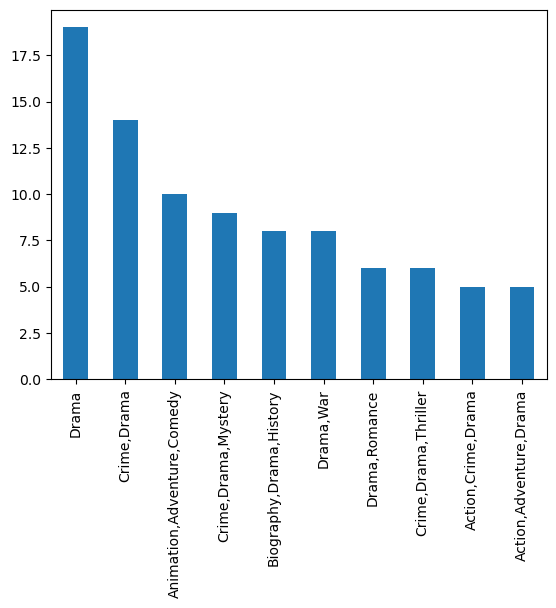

In [13]:
top_genres.plot(kind='bar')

Conclusion: Drama is the most common genre found in the top 250 rated movies on IMDB.

## Question 2
How many movies in the top 250 are directed and written by the same person?

In [14]:
direct_and_write_df = movies_df[movies_df['director_name'] == movies_df['writter_name']]

In [15]:
direct_and_write_df.head()

,rank,id,name,year,imbd_votes,imdb_rating,certificate,duration,genre,cast_id,cast_name,director_id,director_name,writter_name,writter_id,img_link
12,13,tt1375666,Inception,2010,2282447,8.8,UA,148,"Action,Adventure,Sci-Fi","nm0000138,nm0330687,nm0680983,nm0913822,nm0362...","Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...",nm0634240,Christopher Nolan,Christopher Nolan,nm0634240,https://m.media-amazon.com/images/M/MV5BMmQ3ZD...
27,28,tt0076759,Star Wars,1977,1330965,8.6,U,121,"Action,Adventure,Fantasy","nm0000434,nm0000148,nm0000402,nm0000027,nm0001...","Mark Hamill,Harrison Ford,Carrie Fisher,Alec G...",nm0000184,George Lucas,George Lucas,nm0000184,https://m.media-amazon.com/images/M/MV5BOTA5Nj...
30,31,tt0245429,Sen to Chihiro no kamikakushi,2001,737358,8.6,U,125,"Animation,Adventure,Family","nm0153738,nm0687189,nm0997115,nm0383708,nm0622...","Daveigh Chase,Suzanne Pleshette,Miyu Irino,Rum...",nm0594503,Hayao Miyazaki,Hayao Miyazaki,nm0594503,https://m.media-amazon.com/images/M/MV5BMjlmZm...
33,34,tt0110413,Léon,1994,1132261,8.5,A,110,"Action,Crime,Drama","nm0000606,nm0000198,nm0000204,nm0000732,nm0032...","Jean Reno,Gary Oldman,Natalie Portman,Danny Ai...",nm0000108,Luc Besson,Luc Besson,nm0000108,https://m.media-amazon.com/images/M/MV5BNmNhOT...
43,44,tt2582802,Whiplash,2014,816452,8.5,A,106,"Drama,Music","nm1886602,nm0799777,nm2552034,nm0001663,nm3271...","Miles Teller,J.K. Simmons,Melissa Benoist,Paul...",nm3227090,Damien Chazelle,Damien Chazelle,nm3227090,https://m.media-amazon.com/images/M/MV5BYjBmYT...


In [16]:
direct_and_write_df.shape[0]

30

Conclusion: There are 30 movies in the top 250 that are written and directed by the same person.

## Question 3
Does the amount of votes indicate the rank/rating of the movies?

In [21]:
movies_df['imbd_votes'].mean()

620428.732

In [22]:
movies_df['imdb_rating'].mean()

8.311200000000001

In [17]:
group = movies_df.groupby(['imbd_votes', 'rank'])[['imdb_rating']].mean()

In [18]:
group

,,imdb_rating
imbd_votes,rank,
28680,242,8.2
31958,211,8.3
36376,229,8.2
43333,92,8.4
48939,194,8.2
...,...,...
2009640,11,8.8
2048759,12,8.8
2282447,13,8.8


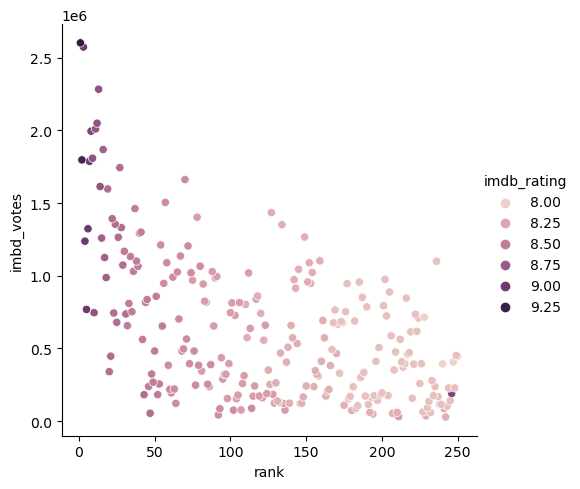

In [20]:
sns.relplot(data=group, x='rank', y='imbd_votes',hue='imdb_rating')

Conclusion: There does appear to be a correlation between the number of votes and the movie's rating/rank on IMDB. The highest rated movies tend to have the most amount of user votes.

## Future analysis

To analyze this dataset in the future, it needs to cleaned, further reviewed, and updated. Some of the columns are even incorrectly spelled such as 'writter_name'.